# Libraries

In [5]:
import os
import re
import glob as g
import math

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Process Data

In [6]:
phs = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

## Collect Data

In [7]:
def get_sasa_data(path, phs):
    data = []
    for n, ph in enumerate(phs):
        D34_data_sub = []
        data_sub = []
        file = '{}/sasa_{}.dat'.format(path, n)
        with open(file, 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split(r'\s+', line)
                    split_line = split_line[1:-1]
                    sasa_val = 0
                    if float(split_line[1]) > 0:
                        sasa_val = float(split_line[1])
                    data_sub.append([int(split_line[0]), sasa_val])
        data.append(data_sub)
    return data

In [8]:
D34_data  = get_sasa_data('D34_data/', phs)
D214_data = get_sasa_data('D214_data/', phs)

## Functions

Note: Includes the stand alone ASP SASA

In [9]:
# pH dependent function 
def ph_depend(pH_list, pH_data, num):
    """
    pH_list: List of pH_values used for Analysis. 
    pH_data: Multidimensional list with all stored data. 
        num: The specific data that you want from your pH_data. 
    """
    ph_depend_data = []
    for n, pH in enumerate(pH_list):
        datum = []
        for dat in pH_data[n]:
            datum.append(dat[num])
        ph_depend_data.append([pH, np.mean(datum)/92.6867, np.std(datum)])
    return ph_depend_data

Save Data

In [10]:
#with open ('6w9c_D11_sasa_phdepend.dat', 'w') as f:
#    ph_data = ph_depend(phs, data, 1)
#    for val in ph_data:
#        f.write("{} {}\n".format(val[0], val[1]))

#### Analysis / Plotting

pH dependence

(0.0, 1.0)

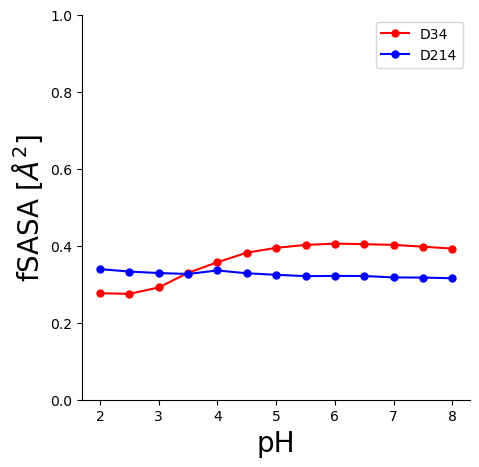

In [11]:
fig, axes = plt.subplots(figsize=(5,5))

legend = ['D34', 'D214']

axes.set_xlabel('pH', fontsize = 20)
axes.set_ylabel('fSASA [$\AA^2$]', fontsize = 20)
axes.plot([x[0] for x in ph_depend(phs, D34_data, 1)], [y[1] for y in ph_depend(phs, D34_data, 1)], 'ro-', markersize=5)
axes.plot([x[0] for x in ph_depend(phs, D214_data, 1)], [y[1] for y in ph_depend(phs, D214_data, 1)], 'bo-', markersize=5)
axes.legend(legend)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, 1)

#plt.savefig('wt_sasa_phdepend.pdf'.format(ph))

Save Data

In [14]:
D34  = [y[1] for y in ph_depend(phs, D34_data, 1)]
D214 = [y[1] for y in ph_depend(phs, D214_data, 1)]
with open('fSASA_D34_D214_apo_s11-65.dat','w') as o:
    o.write('# pH, D34 fSASA, D214 fSASA\n')
    for ph, D1, D2 in zip(phs, D34, D214):
        o.write(f'{ph:0.1f} {D1:0.2f} {D2:0.2f}\n')
        

## D34 Distributions

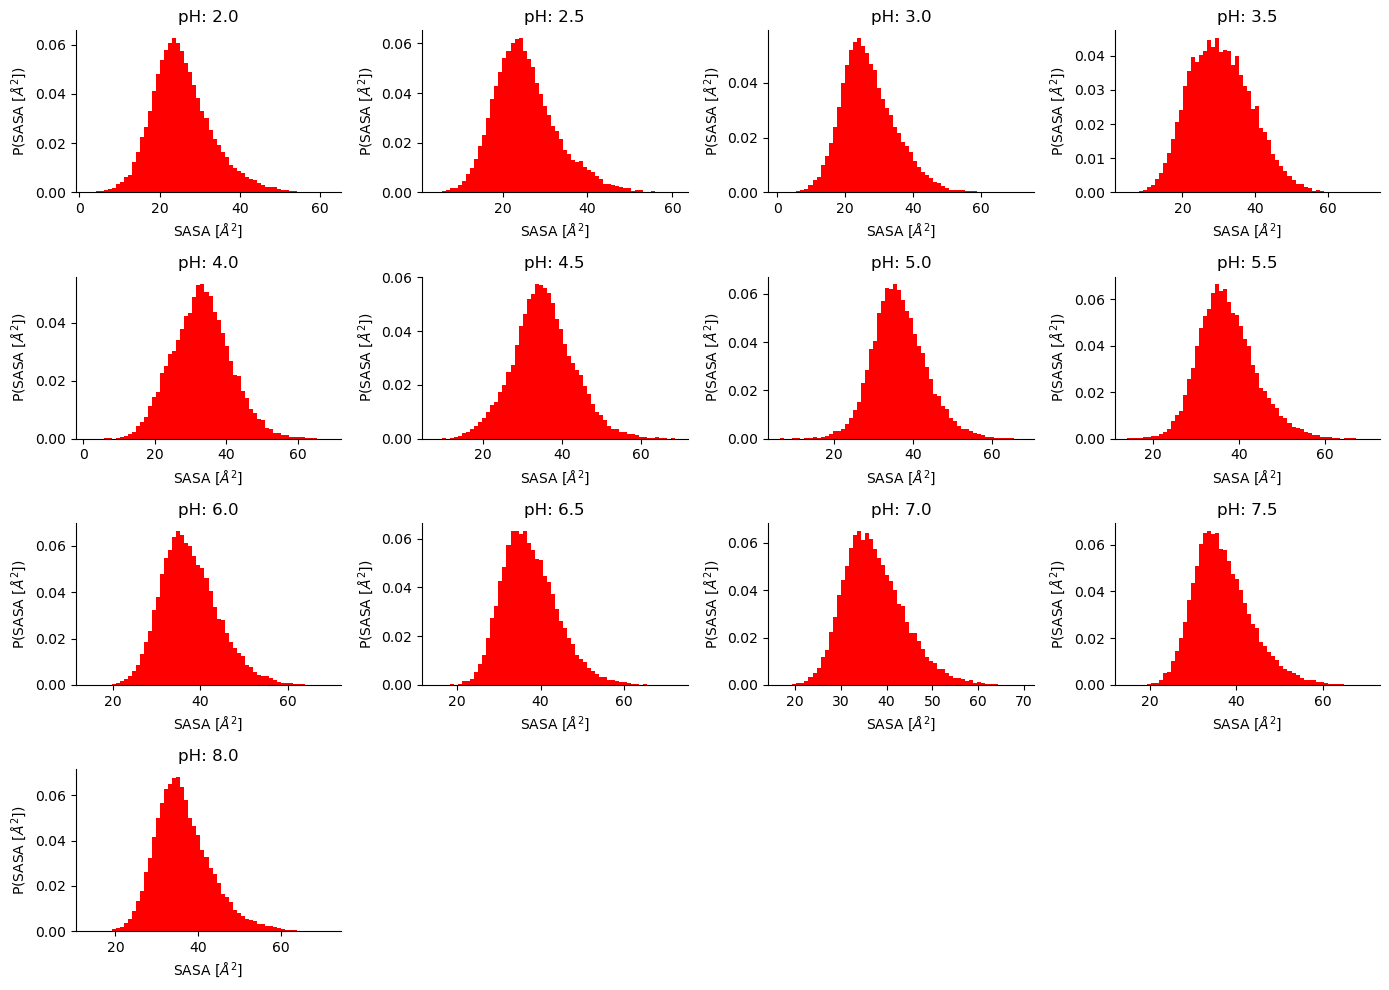

In [8]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

remove_count = 0
for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            axes[index].set_xlabel('SASA [$\AA^2$]')
            axes[index].set_ylabel('P(SASA [$\AA^2$])')
            axes[index].set_title('pH: {}'.format(phs[index]))
            axes[index].hist([x[1] for x in D34_data[index]], bins=60, density=True, color=['Red'])
            axes[index].spines['top'].set_visible(False)
            axes[index].spines['right'].set_visible(False)
            #axes[index].set_ylim(0, 0.1)
            #axes[index].set_xlim(-2.5, 65)
        else:
            axes[index].remove()

fig.tight_layout()
plt.show()

## D214 Distributions

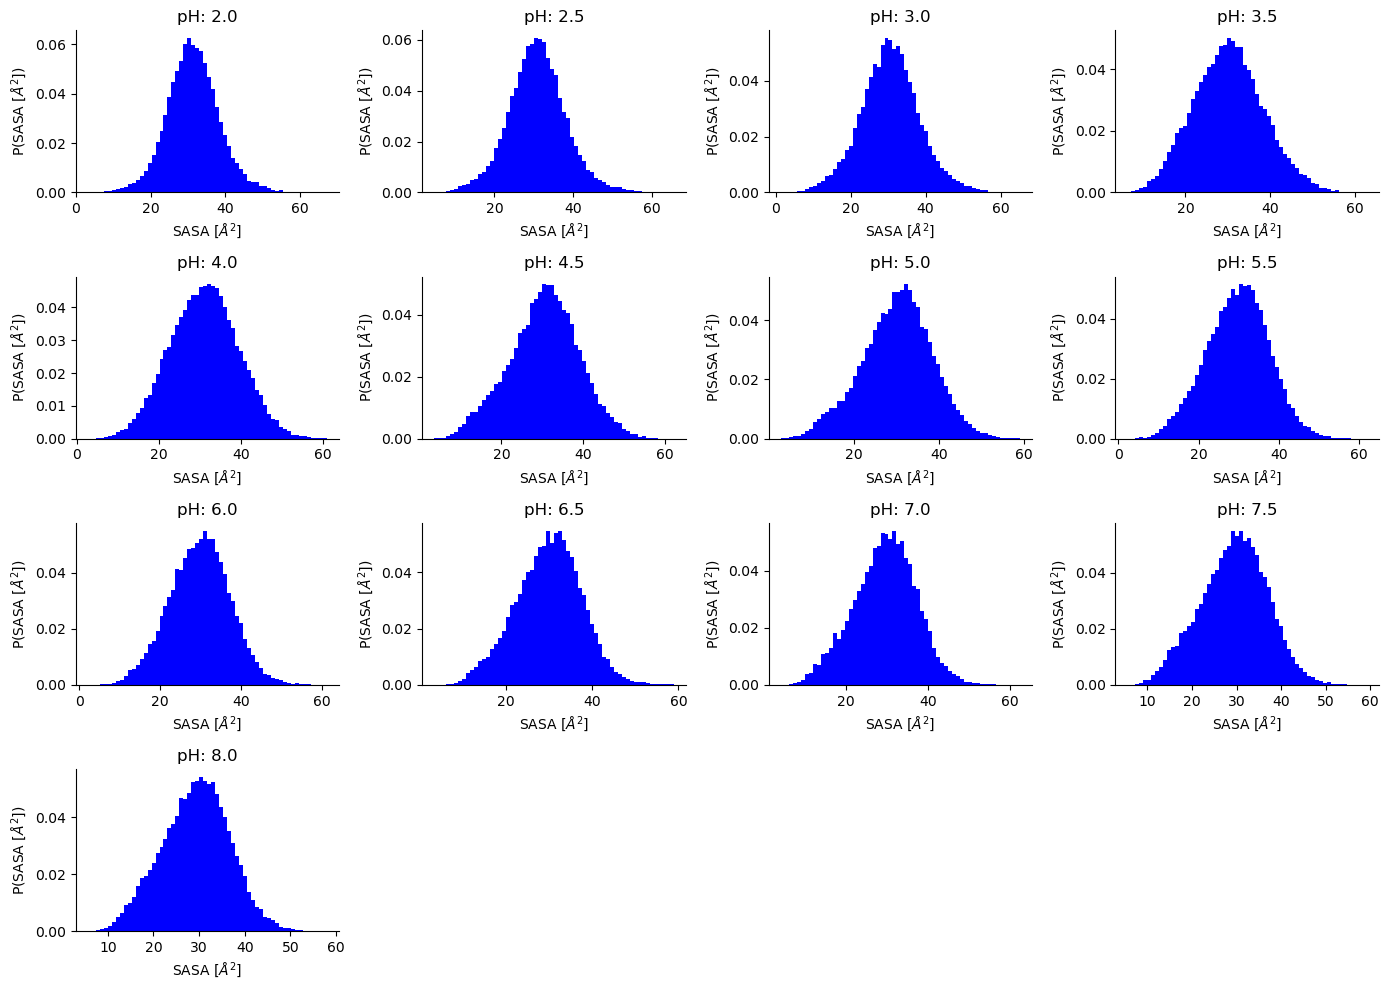

In [9]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

remove_count = 0
for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            axes[index].set_xlabel('SASA [$\AA^2$]')
            axes[index].set_ylabel('P(SASA [$\AA^2$])')
            axes[index].set_title('pH: {}'.format(phs[index]))
            axes[index].hist([x[1] for x in D214_data[index]], bins=60, density=True, color=['Blue'])
            axes[index].spines['top'].set_visible(False)
            axes[index].spines['right'].set_visible(False)
            #axes[index].set_ylim(0, 0.1)
            #axes[index].set_xlim(-2.5, 65)
        else:
            axes[index].remove()

fig.tight_layout()
plt.show()